In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd

In this project, the 2D Potts model was implemented.

# 2D Potts model

The Potts model is a generalization where the spins are now called
colors and can take up to q different values $\text{s ∈ {1, . . . , q}}$

The Hamiltonian of this system, specified by a coupling energy constant $\text{J}$ and a magnetic field $\text{h}$ reads:

\begin{equation}
\mathcal{H}\left(\vec{s}\right) = - \sum_{i,j} J\delta({s_{i},s_{j}}) - \sum_{i} h\delta({s_{i},1})
\end{equation}



## A. Write a function that returns the energy and magnetization of a given configuration state

In [ ]:
#function to create the configuration state: returns LxL matrix with random/homogeneous spins from 0 to q
def state_generator(q, L):
    if q != 1:
        return np.random.randint(1, q+1, (L,L))
    else:
        return np.ones((L,L), int)

In [ ]:
def energy(state, coupling_const, ext_field):
    """Computes the energy of a given configuration state by taking the following steps:
    A. Compute the 1st term of hamiltonian:
    Get the 4 neighbors for each s, since periodic boundary conditions are imposed. 
    Compare the value of s with each neighboring site using kronecker-delta fn: if values are equal, then value is 1, otherwise 0. 
    The total_nb_energy is the negative of the sum of the 4 kronecker-delta fn. The hamiltonian_1st is the product of coupling
    constant and total_nb_energy. 
    
    B. Compute the 2nd term of hamiltonian:
    Compare each s with value of 1, using kronecker-delta fn: if values are equal, then value is 1, otherwise 0.
    Multiply this by the ext_field and save it as hamiltonian_2nd. 
    
    Do A and B for each s across the LxL matrix.
    Energy of a given configuration is hamiltonian_1st - hamiltonian_2nd
    
    Args:
        state(np.array): LxL matrix(spins)
        coupling_const(float): coupling constant
        ext_field(float): external magnetic field
        
    Returns:
        energy(float)
    """
    total_nb_energy = 0
    hamiltonian_2nd = 0
    lx, ly = state.shape
    for i_pair, s in np.ndenumerate(state):
        #get the 4 neighbors for each s
        nb1 = state[(i_pair[0], (i_pair[1]+1)%ly)]
        nb2 = state[(i_pair[0], (i_pair[1]-1)%ly)]
        nb3 = state[((i_pair[0]+1)%lx, i_pair[1])]
        nb4 = state[((i_pair[0]-1)%lx, i_pair[1])]
        #compute total neighbor energy
        total_nb_energy -= (np.array([nb1, nb2, nb3, nb4]) == s).sum()
        #calculate hamiltonian_1st
        hamiltonian_1st = coupling_const/2 * total_nb_energy
        
        #calculate hamiltonian_2nd
        if s == 1:            
            delta_h = 1
            hamiltonian_2nd += ext_field*delta_h
    return hamiltonian_1st - hamiltonian_2nd

In [ ]:
def magnetization(state):
    """Computes the magnetization of a given configuration state by taking the percentage of spins with s = 1  
    Args:
        state(np.array): LxL matrix(spins)
        
    Returns:
        magnetization(float)    
    """
    return np.sum(state == 1)/(state.shape[0]*state.shape[1])

## Sanity checks for energy

In [ ]:
coupling_const = 2
ext_field = 0.1

#### State with s = 1

In [ ]:
one_state = state_generator(1, 3)
one_state

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [ ]:
one_energy = energy(one_state, coupling_const, ext_field)
one_energy

-36.9

In [ ]:
#compare with correct answer
N = one_state.size
one_energy_correct = -(coupling_const*N*2) - (N*ext_field)
one_energy_correct

-36.9

#### State with homogenous color s, except for s = 1

In [ ]:
other_state = state_generator(1, 3)*2
other_state

array([[2, 2, 2],
       [2, 2, 2],
       [2, 2, 2]])

In [ ]:
other_energy = energy(other_state, coupling_const, ext_field)
other_energy

-36.0

In [ ]:
#compare with correct answer
N = other_state.size
other_energy_correct = -coupling_const*N*2
other_energy_correct

-36

## Sanity checks for magnetization

In [ ]:
#all s = 1
one_magnetization = magnetization(one_state)
one_magnetization

1.0

In [ ]:
#homogenous color, except for s = 1
other_magnetization = magnetization(other_state)
other_magnetization

0.0

## Sanity checks for random states of 0 to q

In [ ]:
q = 4
L = 5
random_state = state_generator(q, L)
random_state

array([[2, 2, 2, 4, 3],
       [3, 2, 3, 2, 1],
       [4, 4, 3, 3, 1],
       [1, 2, 1, 2, 4],
       [2, 1, 1, 4, 2]])

#### Energy

In [ ]:
random_energy = energy(random_state, coupling_const, ext_field)
random_energy

-24.6

In [ ]:
#correct answer
N = random_state.size
energy_random_correct = -(coupling_const*N*(2/q)) - (N*(ext_field/q))
energy_random_correct

-25.625

#### Magnetization

In [ ]:
random_magnetization = magnetization(random_state)
random_magnetization

0.24

In [ ]:
#correct answer
random_magnetization_correct = 1/q
random_magnetization_correct

0.25

#### Energy and magnetization distribution

This tells us if the computed magnetization and energy values from the function are distributed around the correct energy and magnetization values

In [ ]:
%%time
n_realizations =1000
q = 2
L = 10
coupling_const = 2
ext_field = 0.1

energy_list = []
magnetization_list = []
for i in range(n_realizations):
    random_state = state_generator(q, L)
    random_energy = energy(random_state, coupling_const, ext_field)
    random_magnetization = magnetization(random_state)
    
    energy_list.append(random_energy)
    magnetization_list.append(random_magnetization)

Wall time: 695 ms


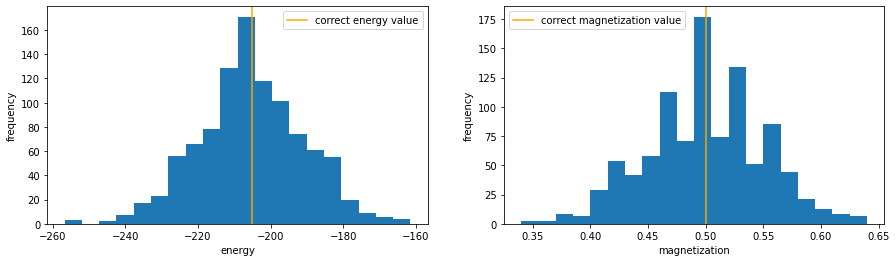

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,4))

N = random_state.size
energy_correct = -(coupling_const*N*(2/q)) - (N*(ext_field/q))
magnetization_correct = 1/q

ax[0].hist(energy_list, bins=20)
ax[0].axvline(energy_correct, color = 'orange', label='correct energy value')
ax[0].set_xlabel('energy')
ax[0].set_ylabel('frequency')
ax[0].legend()

ax[1].hist(magnetization_list, bins=20)

ax[1].axvline(magnetization_correct, color = 'orange', label='correct magnetization value')
ax[1].set_xlabel('magnetization')
ax[1].set_ylabel('frequency')
ax[1].legend()
plt.show()

## B. Metropolis Markov Chain

The idea of Markov Chain Montecarlo is to jump around among the states of the systems (without enumerating all of them) by choosing the transition probabilities in such a way that the states obtained after each jump are samples that follow the probability distribution of the model.

In [ ]:
#computes the energy difference between 2 states
def delta_energy(state, state_prime, coupling_const, ext_field):
    state_energy = energy(state, coupling_const, ext_field)
    state_prime_energy = energy(state_prime, coupling_const, ext_field)
    return state_prime_energy - state_energy

#### Sanity check

In [ ]:
state = np.array([[1, 2, 2],[2, 1, 1],[2, 1, 1]])
state_prime = np.array([[2, 2, 2],[2, 1, 1],[2, 1, 1]])
coupling_const = 1
ext_field = 0.1
delta_e = delta_energy(state, state_prime, coupling_const, ext_field)
delta_e

-3.9000000000000004

In [ ]:
def metropolis_step(state, q, coupling_const, ext_field, beta):
    """Outputs a new configuration of state following the steps below:
    1. Given a state, generate a candidate (new_configuration) where a site can have any of the colors other than it's original color.
    2. Compute the energy difference (delta_e) between the state and the new_configuration
    3. Apply a condition: if delta_e <= 0, accept the new_configuration, if not, accept the new_configuration only with probability
    p = exp(-beta*delta_e)
    
    Args:
        state(np.array): LxL matrix(spins) 
        q(int): how many colors in a state
        coupling_const(float): coupling constant
        ext_field(float): external magnetic field
        beta(float): beta (inverse temperature)
        
    Returns:
        new_configuration(np.array): LxL matrix (spins)
    """
    new_configuration = []
    
    lx, ly = state.shape
    flattened_state = state.flatten()
    #choose 1 element from the state
    chosen_index = np.random.randint(0,lx**2)    
    original_element = flattened_state[chosen_index]
    #choose random value of q
    new_element = np.random.randint(1,q+1)
    #change element to another color except itself
    while new_element == original_element:
        new_element = np.random.randint(1,q+1)
    #replace the original_element to the new_element
    flattened_state[chosen_index] = new_element
    new_state = flattened_state.reshape(lx, ly)
    #calculate energy:
    delta_e = delta_energy(state, new_state, coupling_const, ext_field)
    #condition: if delta_e <= 0, accept the new configuration, if not, accept the new configuration only with probability
    #p = exp(-beta*delta_e)
    if delta_e <= 0:
        new_configuration = new_state
    else:
        prob = np.exp(-beta*delta_e)
        unif = np.random.rand()
        if unif < prob:  
            new_configuration = new_state
        else:
            new_configuration = state
    return new_configuration

#### Sanity check

In [ ]:
%%time
n_realizations = 10000
q = 2
L = 20
coupling_const = 1
ext_field = 0.1
beta = 10
state = state_generator(q, L)
print('orig state', state)
for i in range(n_realizations):    
    state = metropolis_step(state, q, coupling_const, ext_field, beta)
    if state.flatten().sum() == L**2:
        print('After', i ,'metropolis steps, the desired new_configuration (having all spins = 1) is obtained')
        final_state = state
        break

print('final_state', final_state)

orig state [[2 1 2 1 1 2 1 1 1 1 2 2 2 2 1 2 2 2 1 1]
 [2 2 2 2 2 1 2 2 2 2 2 2 2 1 1 2 2 2 1 1]
 [1 2 2 1 2 2 1 2 2 1 2 2 2 1 1 1 1 2 1 2]
 [2 1 1 2 1 2 2 2 1 1 2 1 1 2 2 2 1 2 1 2]
 [2 1 1 2 2 1 1 1 1 1 1 2 2 2 1 1 1 1 1 2]
 [1 2 2 2 1 1 1 2 1 1 2 1 2 1 2 1 1 1 1 1]
 [1 1 2 2 2 2 2 2 2 1 1 1 2 1 1 2 2 2 1 2]
 [2 2 1 1 1 1 1 2 1 2 2 1 1 2 1 2 1 1 1 1]
 [2 1 1 2 1 1 2 2 1 2 1 2 1 1 1 1 1 2 1 1]
 [1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 1 1 2 2 2]
 [2 1 2 2 1 1 2 2 1 2 1 2 1 2 2 1 1 2 2 2]
 [1 1 1 1 1 2 1 1 1 2 1 2 1 1 1 2 1 1 2 1]
 [1 1 2 1 2 1 1 2 1 1 2 1 1 1 1 2 1 1 2 2]
 [2 2 2 1 2 2 2 2 1 1 2 1 2 2 2 1 2 1 1 1]
 [1 2 1 2 1 2 1 1 1 2 1 2 2 2 1 2 1 2 1 2]
 [2 1 2 2 2 1 1 2 1 1 2 1 2 1 1 1 2 2 2 2]
 [1 1 1 2 1 1 1 2 2 2 1 1 1 2 1 1 2 1 1 2]
 [2 1 2 1 2 2 1 2 2 1 2 2 1 2 1 2 2 1 2 2]
 [2 1 1 1 2 1 1 2 2 2 2 2 2 1 2 2 1 2 1 2]
 [2 2 2 1 1 2 2 1 2 1 2 1 2 1 1 1 2 1 2 2]]
After 3777 metropolis steps, the desired new_configuration (having all spins = 1) is obtained
final_state [[1 1 1 1 1 1 1 1 1 1 

## Numerical Investigations

In [ ]:
#different beta critical for each q
coupling_const = 1
q_list = [1,2,3,4,5,6]
critical_beta_list = []
for q in q_list:
    critical_beta = np.log(1+np.sqrt(q))/coupling_const
    critical_beta_list.append(critical_beta)

pd.DataFrame(np.array([q_list, critical_beta_list]).T, columns=['q', 'beta_critical']).set_index('q')

,beta_critical
q,
1.0,0.693147
2.0,0.881374
3.0,1.005053
4.0,1.098612
5.0,1.174359
6.0,1.238226


## Plot average energy and average magnetization vs beta:

To plot the average energy and magnetization at different beta values, there is a need to:
* discard the burn-in time to equilbriate the chain
* discard the samples that are correlated

This is so we can use properly generated samples from the Metropolis algorithm


### 1. Plot energy and magnetization vs time steps: for different beta and q = 2, q = 5

In [ ]:
def single_trajectories(L, q, coupling_const, ext_field, beta, max_time):
    """Calculates the magnetization and energy for each metropolis step
    
    Args:
        L(int): number of rows/columns of the matrix(spins)
        q(int): how many colors in a given state
        coupling_const(float): coupling constant
        ext_field(float): external magnetic field
        beta(float): beta (inverse temperature)
        max_time(int): number of iterations
        
    Returns:
        magnet_trajectory(list, len = max_time): contains the magnetization values computed at each metropolis step
        energy_trajectory(list, len = max_time): contains the energy values computed at each metropolis step
    """
    magnet_trajectory  = []
    energy_trajectory  = []
    #generate a random state
    state = state_generator(q, L)
    #perform metropolis step for max_time iterations and compute magnetization and energy at each step
    for n in range(max_time):
        state = metropolis_step(state, q, coupling_const, ext_field, beta)
        one_magnetization = magnetization(state)
        one_energy = energy(state, coupling_const, ext_field)
        magnet_trajectory.append(one_magnetization)
        energy_trajectory.append(one_energy)
    return magnet_trajectory, energy_trajectory

#function to calculate average trajectory after performing n_realizations
def average_trajectories(L, q, coupling_const, ext_field, beta, max_time, n_realizations):
    average_trajectory_magnet = np.zeros(max_time)
    average_trajectory_energy = np.zeros(max_time)
    for r in range(n_realizations):
        magnet_trajectory, energy_trajectory = single_trajectories(L, q, coupling_const, ext_field, beta, max_time)
        average_trajectory_magnet += np.array(magnet_trajectory)/n_realizations
        average_trajectory_energy += np.array(energy_trajectory)/n_realizations
    return average_trajectory_magnet, average_trajectory_energy

In [ ]:
%%time
L = 10
coupling_const = 1
ext_field = 0.05
max_time_list = [5000, 15000]
beta_list = np.linspace(0.1,2.0,20)
q_list = [2,5]
n_realizations = 5

#Given the parameters above, compute the energy and magnetization values for q = 2(max_time = 3000), q = 5(max_time = 6000) 
#for 50 different beta values for only 1 realization:

#Store the magnetization and energy trajectories for each q
energy_q_list = []
magnetization_q_list = []
for i, q in enumerate(q_list):
    #Iterate over the different values of q and max_time
    ave_energy_trajectory = []
    ave_magnetization_trajectory = []
    for beta in tqdm(beta_list):
        #For each q, iterate over the different beta values
        ave_magnet_traj, ave_e_traj = average_trajectories(L, q, coupling_const, ext_field, beta, max_time_list[i], n_realizations)
        
        #Store the magnetization and energy trajectories for each beta
        ave_energy_trajectory.append(ave_e_traj)
        ave_magnetization_trajectory.append(ave_magnet_traj)
        
    energy_q_list.append(ave_energy_trajectory)
    magnetization_q_list.append(ave_magnetization_trajectory)

100%|██████████| 20/20 [1:20:15<00:00, 240.80s/it]

Wall time: 1h 47min 6s


Notes: I only performed 5 realizations, it would be best to do this process over a lot of n_realizations. The reason for doing this is because, let's say q = 2, at the end of the max_time iterations, the states will become: all spins = 1 or all spins = 2, or a mix of 1 and 2 (when number of iterations is small). But when we perform this process over a lot of realizations, we would see the magnetization and energy that is "more correct", in the sense that we performed a lot of trials.

##### Energy vs time steps (show samples of beta only)

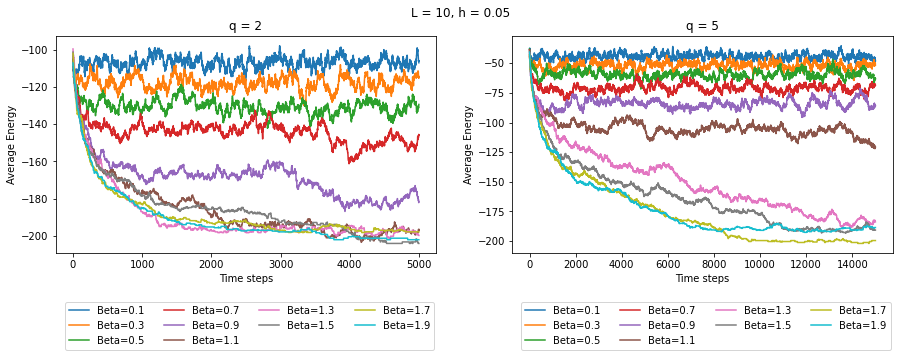

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,4))

q2_energy = energy_q_list[0]
q5_energy = energy_q_list[1]

for i in range(len(beta_list[::2])):
    ax[0].plot(q2_energy[::2][i], label="Beta={}".format(np.round(beta_list[::2][i], 2)))
    ax[1].plot(q5_energy[::2][i], label="Beta={}".format(np.round(beta_list[::2][i], 2)))
    
ax[0].set_xlabel('Time steps')
ax[0].set_ylabel('Average Energy')
ax[0].legend(loc='upper left', bbox_to_anchor=(0.01, -0.2), ncol = 4)

ax[1].set_xlabel('Time steps')
ax[1].set_ylabel('Average Energy')
ax[1].legend(loc='upper left', bbox_to_anchor=(0.01, -0.2), ncol = 4)

ax[0].set_title('q = 2')
ax[1].set_title('q = 5')
plt.suptitle('L = {}, h = {}'.format(L, ext_field))
plt.show()

As we would expect, the energy decreases as beta increases


##### Magnetization vs time steps (show samples of beta only)

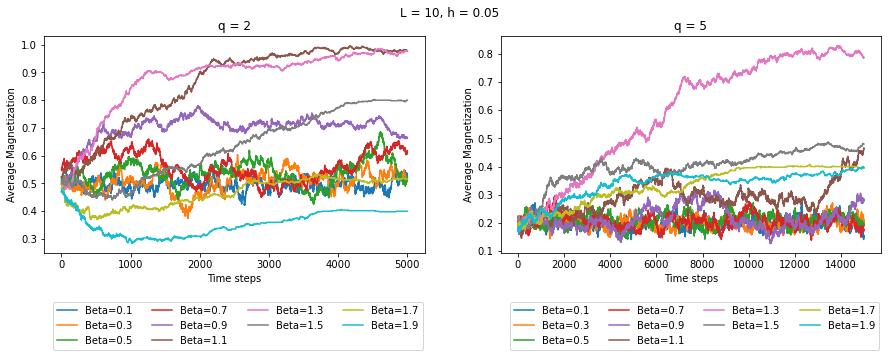

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,4))

q2_magnetization = magnetization_q_list[0]
q5_magnetization = magnetization_q_list[1]

for i in range(len(beta_list[::2])):
    ax[0].plot(q2_magnetization[::2][i], label="Beta={}".format(np.round(beta_list[::2][i], 2)))
    ax[1].plot(q5_magnetization[::2][i], label="Beta={}".format(np.round(beta_list[::2][i], 2)))
ax[0].set_xlabel('Time steps')
ax[0].set_ylabel('Average Magnetization')

ax[1].set_xlabel('Time steps')
ax[1].set_ylabel('Average Magnetization')
ax[0].legend(loc='upper left', bbox_to_anchor=(0.01, -0.2), ncol = 4)
ax[1].legend(loc='upper left', bbox_to_anchor=(0.01, -0.2), ncol = 4)

ax[0].set_title('q = 2')
ax[1].set_title('q = 5')
plt.suptitle('L = {}, h = {}'.format(L, ext_field))
plt.show()

As we would expect, magnetization increases as beta increases. However, this was only performed over 5 realizations, and so we see that there are
trajectories that did not approach magnetization = 1, and did not follow the trend that we are expecting. We already see from one of the sanity checks above that after ~4000 metropolis steps, (L = 20, and q = 2), will reach the state where all spins = 1. I think mayber that there is no problem with the code, but with the parameters chosen: L, number of iterations, number of realizations. More exploratory work can be done in the future. 

Notes: Also, with more realizations, the trajectories of average energy and average magnetization will become less noisy (I made a couple of experiments before, with only 16 different values of beta and did over 100 n_realizations and observed this). 

We can see that the model needs some time to move from the random initial confiuration to the "equilibrium" one (where it doesn't change anymore). 

### 2. Determine burn-in-time

The samples that we want to generate through the chain should be only taken at equilibrium, and therefore we want to discard what happened before (the transient time). The burn-in-time is defined as the point where the energy/magnetization values still change. Burn-in time for magnetization and energy is different for each beta. 

Visually, we can estimate the burn-in time for the different betas for energy and magnetization from the plots above. As always, it is best to determine the burn-in time after a lot of n_realizations has been performed.

In [ ]:
def plot_points(num_points, array):
    plotter_array = []
    for i in range(len(array)):
        each_beta = array[i]
        final_energy = each_beta[0:num_points]
        plotter_array.append(final_energy)
    return plotter_array

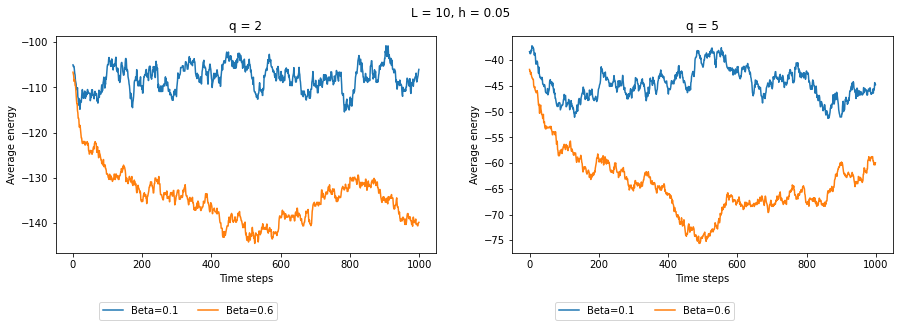

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,4))

q2_energy = energy_q_list[0]
q5_energy = energy_q_list[1]

q2_energy_plotting = plot_points(1000, q2_energy)
q5_energy_plotting = plot_points(1000, q5_energy)

for i in range(len(beta_list[:10:5])):
    ax[0].plot(q2_energy_plotting[:10:5][i], label="Beta={}".format(np.round(beta_list[:10:5][i], 2)))
    ax[1].plot(q5_energy_plotting[:10:5][i], label="Beta={}".format(np.round(beta_list[:10:5][i], 2)))
    
ax[0].set_xlabel('Time steps')
ax[0].set_ylabel('Average energy')
ax[0].legend(loc='upper left', bbox_to_anchor=(0.1, -0.2), ncol = 4)

ax[1].set_xlabel('Time steps')
ax[1].set_ylabel('Average energy')
ax[1].legend(loc='upper left', bbox_to_anchor=(0.1, -0.2), ncol = 4)


ax[0].set_title('q = 2')
ax[1].set_title('q = 5')
plt.suptitle('L = {}, h = {}'.format(L, ext_field))
plt.show()

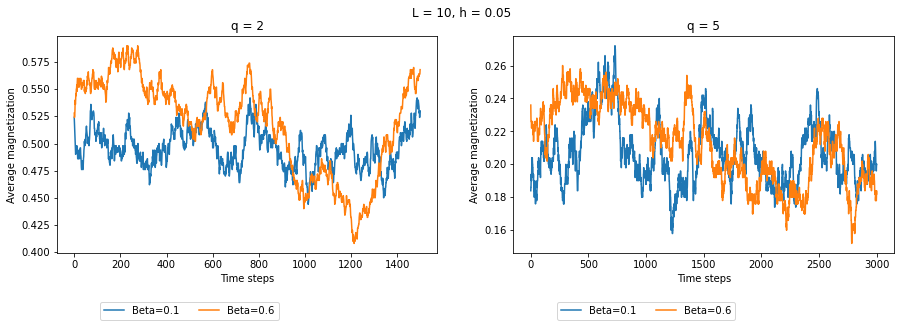

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,4))

q2_magnetization = magnetization_q_list[0]
q5_magnetization = magnetization_q_list[1]

q2_magnet_plotting = plot_points(1500, q2_magnetization)
q5_magnet_plotting = plot_points(3000, q5_magnetization)

for i in range(len(beta_list[:10:5])):
    ax[0].plot(q2_magnet_plotting[:10:5][i], label="Beta={}".format(np.round(beta_list[:10:5][i], 2)))
    ax[1].plot(q5_magnet_plotting[:10:5][i], label="Beta={}".format(np.round(beta_list[:10:5][i], 2)))
    
ax[0].set_xlabel('Time steps')
ax[0].set_ylabel('Average magnetization')
ax[0].legend(loc='upper left', bbox_to_anchor=(0.1, -0.2), ncol = 3)

ax[1].set_xlabel('Time steps')
ax[1].set_ylabel('Average magnetization')
ax[1].legend(loc='upper left', bbox_to_anchor=(0.1, -0.2), ncol = 3)


ax[0].set_title('q = 2')
ax[1].set_title('q = 5')
plt.suptitle('L = {}, h = {}'.format(L, ext_field))
plt.show()

Notes: These plots are not different from the earlier plots above but is just shown with fewer time steps to get a better estimate for the burn-in time visually for some beta

In [ ]:
burn_in_time_list_energyq2 = []
for beta in beta_list:
    if beta < 0.1:
        bit = 200
    elif (beta <= 1.1) and (beta >= 0.1):
        bit = 600
    else:
        bit = 2000
    burn_in_time_list_energyq2.append(bit)

burn_in_time_list_energyq5 = []
for beta in beta_list:
    if beta < 0.1:
        bit = 200
    elif (beta <= 0.6) and (beta >= 0.1):
        bit = 600
    else:
        bit = 1000
    burn_in_time_list_energyq5.append(bit)
    
burn_in_time_list_magnetizationq2 = []
for beta in beta_list:
    if beta <= 0.6:
        bit = 200
    else:
        bit = 2000
    burn_in_time_list_magnetizationq2.append(bit)

burn_in_time_list_magnetizationq5 = []
for beta in beta_list:
    if beta <= 0.6:
        bit = 1000
    else:
        bit = 6000
    burn_in_time_list_magnetizationq5.append(bit)

### 3. Determine the correlation length of the chain

In Montecarlo methods the samples must be independent. This is not true in general for all the samples that Metropolis algorithm generates. The method to get independent samples is to discard a certain number of samples before considering the next one which will be used to compute the sample average. The question is: how many samples I have to discard?

The correlation time is obtained when 
$$
\rho(t_1, t_2) = \frac{\langle M_{t_1} M_{t_2} \rangle - \langle M_{t_1}\rangle \langle M_{t_2} \rangle  }{\text{std}(M_{t_1})\text{std}(M_{t_2})}
$$

The two variables are independent when $\rho = 0$ since the average of their product is the product of their averages.

Consistent with the burn-in time method, we would need to compute autocorrelation for each beta (instead of using 1 autocorrelation value for all beta). But since it would also require too much work, in this project, the autocorrelation was computed for only 1 beta. And for simplicity, we use the autocorrelation found at a large temperature (beta < beta_critical), since autocorrelation explodes in the "aligned" phase.

In [ ]:
def magnet_autocorrelation(q, L, beta, coupling_const, ext_field, burn_in_time, max_time, n_realizations):
    """This computes the temporal autocorrelation from "burn_in_time" for "max_time" of the average magnetization over "n_realizations".
    having side L, "beta", "J" and "h". 
    Args:
        L(int): number of rows/columns of the matrix(spins)
        q(int): how many colors in a state
        beta(float): beta (inverse temperature)
        coupling_const(float): coupling constant
        ext_field(float): external magnetic field
        burn_in_time(int): the number of samples that correspond to the transient time (that needs to be discarded)
        max_time(int): the number of iterations
        n_realizations(int): the number of realziations       
        
    Returns:
        rho(float): autocorrelation"""
    # Init the magnetization product, the first and the second moments
    prod = np.zeros(max_time)
    average_at_start = 0
    average_at_next = np.zeros(max_time)
    sec_moment_at_start = 0
    sec_moment_at_next = np.zeros(max_time)

    for i in range(n_realizations):

        # Equilibration
        state = state_generator(q, L)
        for j in range(burn_in_time):
            state = metropolis_step(state, q, coupling_const, ext_field, beta)

        # The start value of the magetization is computed after the burn-in period.
        start_magnet = magnetization(state)
        average_at_start += start_magnet / n_realizations
        sec_moment_at_start += start_magnet * start_magnet / n_realizations

        # Storing the value of all the magnetizations after the burn-in
        traj = np.array([])
        for k in range(burn_in_time, burn_in_time + max_time):
            state = metropolis_step(state, q, coupling_const, ext_field, beta)
            traj = np.append(traj, magnetization(state))
        # Computing the statistical variables 
        prod += start_magnet * traj / n_realizations
        average_at_next += traj / n_realizations
        sec_moment_at_next += traj*traj / n_realizations

    std_start = np.sqrt(sec_moment_at_start - average_at_start**2)
    std_next = np.sqrt(sec_moment_at_next - average_at_next**2)
    return (prod - average_at_next*average_at_start) / std_start / std_next


def energy_autocorrelation(q, L, beta, coupling_const, ext_field, burn_in_time, max_time, n_realizations):
    """This computes the temporal autocorrelation from "burn_in_time" for "max_time" of the average energy over "n_realizations".
    having side L, "beta", "J" and "h". 
    Args:
        L(int): number of rows/columns of the matrix(spins)
        q(int): how many colors in a state
        beta(float): beta (inverse temperature)
        coupling_const(float): coupling constant
        ext_field(float): external magnetic field
        burn_in_time(int): the number of samples that correspond to the transient time (that needs to be discarded)
        max_time(int): the number of iterations
        n_realizations(int): the number of realziations       
        
    Returns:
        rho(float): autocorrelation"""

    # Init the energy product, the first and the second moments
    prod = np.zeros(max_time)
    average_at_start = 0
    average_at_next = np.zeros(max_time)
    sec_moment_at_start = 0
    sec_moment_at_next = np.zeros(max_time)

    for i in range(n_realizations):

        # Equilibration
        state = state_generator(q, L)
        for j in range(burn_in_time):
            state = metropolis_step(state, q, coupling_const, ext_field, beta)

        # The start value of the energy is computed after the burn-in period.
        start_energy = energy(state, coupling_const, ext_field)
        average_at_start += start_energy / n_realizations
        sec_moment_at_start += start_energy * start_energy / n_realizations

        # Storing the value of all the energy after the burn-in
        traj = np.array([])
        for k in range(burn_in_time, burn_in_time + max_time):
            state = metropolis_step(state, q, coupling_const, ext_field, beta)
            traj = np.append(traj, energy(state, coupling_const, ext_field))
        # Computing the statistical variables 
        prod += start_energy * traj / n_realizations
        average_at_next += traj / n_realizations
        sec_moment_at_next += traj*traj / n_realizations

    std_start = np.sqrt(sec_moment_at_start - average_at_start**2)
    std_next = np.sqrt(sec_moment_at_next - average_at_next**2)
    return (prod - average_at_next*average_at_start) / std_start / std_next

In [ ]:
%%time
L = 10
coupling_const = 1
ext_field = 0.05
max_time = 2000
n_realizations = 100
q_list = [2, 5]
burn_in_time_list = [250, 1000]
beta = 0.2

#Given the parameters above, compute the autocorrelation values for magnetization and energy, 
#using 1 beta for this case, and doing it for q = 2 (burn in time = 250), and q = 5 (burn in time = 1000). 

magnet_autocorr_list = []
energy_autocorr_list = []
for q, burn_in_time in tqdm(zip(q_list, burn_in_time_list)):

    #iterate over different values for q, and burn-in time       
    magnet_autocorr = magnet_autocorrelation(q, L, beta, coupling_const, ext_field, burn_in_time, max_time, n_realizations) 
    energy_autocorr = energy_autocorrelation(q, L, beta, coupling_const, ext_field, burn_in_time, max_time, n_realizations)
    
    magnet_autocorr_list.append(magnet_autocorr)
    energy_autocorr_list.append(energy_autocorr)

2it [46:10, 1385.28s/it]

Wall time: 46min 10s


#### Energy Autocorrelation

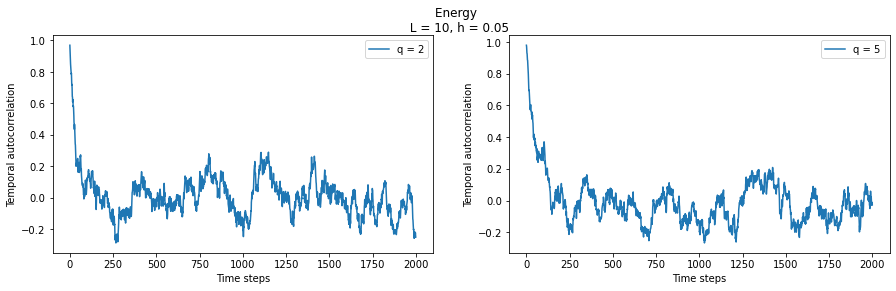

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,4))

q2_energy_autocorr = energy_autocorr_list[0]
q5_energy_autocorr = energy_autocorr_list[1]

ax[0].plot(q2_energy_autocorr, label = 'q = 2')
ax[1].plot(q5_energy_autocorr, label = 'q = 5')
ax[0].set_xlabel('Time steps')
ax[0].set_ylabel('Temporal autocorrelation')

ax[1].set_xlabel('Time steps')
ax[1].set_ylabel('Temporal autocorrelation')

ax[0].legend()
ax[1].legend()

plt.suptitle('Energy \n L = {}, h = {}'.format(L, ext_field))
plt.show()

#### Magnetization Autocorrelation

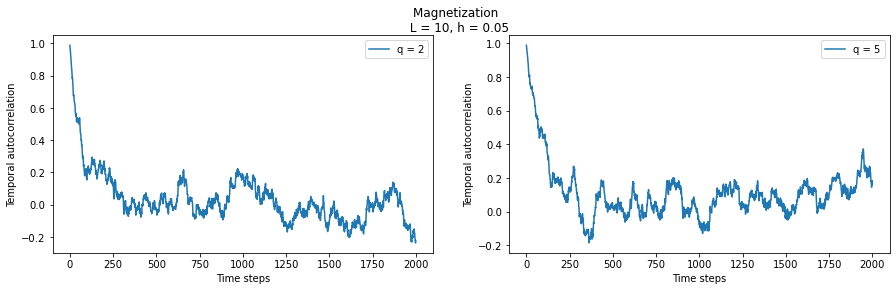

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,4))

q2_magnetization_autocorr = magnet_autocorr_list[0]
q5_magnetization_autocorr = magnet_autocorr_list[1]

ax[0].plot(q2_magnetization_autocorr, label = 'q = 2')
ax[1].plot(q5_magnetization_autocorr, label = 'q = 5')
ax[0].set_xlabel('Time steps')
ax[0].set_ylabel('Temporal autocorrelation')

ax[1].set_xlabel('Time steps')
ax[1].set_ylabel('Temporal autocorrelation')

ax[0].legend()
ax[1].legend()
plt.suptitle('Magnetization \n L = {}, h = {}'.format(L, ext_field))
plt.show()

The plots above show energy autocorrelation vs time steps and magnetization autocorrelation vs time steps. However, this was only computed using 1 value of beta i.e., beta = 0.2 (corresponding to high temperature). From the plots,  the correlation time can be estimated as correlation_time = 250.

### 4. Plot average energy and magnetization vs beta 

Using the burn-in time and correlation time values from the results above, we can now plot average energy vs beta and average magnetization vs beta, after discarding the samples that correspond to the burn-in time, and discarding those correlated samples:

In [ ]:
def uncorrelated_samples(array, burn_in_time_list, correlation_time):
    final_array = []
    for i, bit in zip(range(len(array)), burn_in_time_list):
        get_array_of_each_beta = array[i]
        after_burn_in = np.mean(get_array_of_each_beta[bit::correlation_time])
        final_array.append(after_burn_in)
    return final_array

def compute_error(array, burn_in_time_list, correlation_time):
    final_error = []
    for i, bit in zip(range(len(array)), burn_in_time_list):
        get_array_of_each_beta = array[i]
        after_burn_in = get_array_of_each_beta[bit::correlation_time]
        n_corr_samples = len(after_burn_in)
        error = np.std(after_burn_in)/np.sqrt(n_corr_samples)
        final_error.append(error)
    return final_error

In [ ]:
L = 10
correlation_time = 250
coupling_const = 1
ext_field = 0.05

error for q2 [0.65684 0.55003 0.80068 0.69156 0.81831 0.91017 1.3642  1.78316 1.72866
 2.29072 2.35696 2.32522 1.63133 2.2736  2.31655 1.36394 1.37835 1.56931
 1.67123 1.17947]
error for q5 [0.32344 0.33772 0.43323 0.36102 0.37666 0.44153 0.45954 0.45151 0.54781
 1.09339 0.65872 2.03973 2.74128 2.81226 2.41677 1.89002 2.59845 2.02368
 1.9082  2.0208 ]


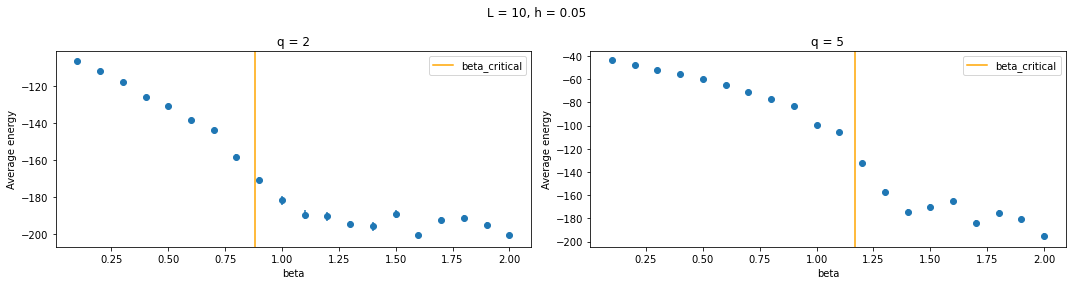

In [ ]:
energy_values_q2 = uncorrelated_samples(q2_energy, burn_in_time_list_energyq2, correlation_time)
energy_error_q2 = compute_error(q2_energy, burn_in_time_list_energyq2, correlation_time)

energy_values_q5 = uncorrelated_samples(q5_energy, burn_in_time_list_energyq5, correlation_time)
energy_error_q5 = compute_error(q5_energy, burn_in_time_list_energyq5, correlation_time)

fig, ax = plt.subplots(1,2,figsize=(15,4))
print('error for q2', np.round(energy_error_q2,5))
ax[0].errorbar(beta_list,energy_values_q2,energy_error_q2, fmt = 'o')
ax[1].errorbar(beta_list,energy_values_q5,energy_error_q5, fmt = 'o')

print('error for q5', np.round(energy_error_q5,5))


ax[0].set_xlabel('beta')
ax[0].set_ylabel('Average energy')
ax[1].set_xlabel('beta')
ax[1].set_ylabel('Average energy')

ax[0].axvline(0.88,color='orange',label='beta_critical')
ax[1].axvline(1.17,color='orange',label='beta_critical')

ax[0].legend()
ax[1].legend()

ax[0].set_title('q = 2')
ax[1].set_title('q = 5')
plt.suptitle('L = {}, h = {}'.format(L, ext_field))
plt.tight_layout()
plt.show()

Average energy decreases as beta increases

error for q2 [0.00381 0.00776 0.00878 0.00833 0.00943 0.0099  0.01064 0.00812 0.00609
 0.02034 0.02816 0.00959 0.01716 0.01435 0.02806 0.00689 0.01124 0.00861
 0.00916 0.01363]
error for q5 [0.00242 0.00276 0.00255 0.00289 0.00333 0.00356 0.00331 0.00531 0.00593
 0.00481 0.0067  0.00685 0.0236  0.00958 0.00499 0.00329 0.00748 0.00502
 0.00446 0.0104 ]


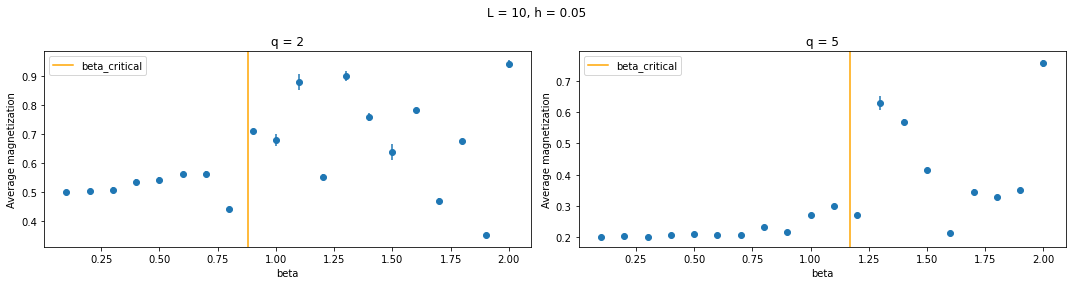

In [ ]:
magnetization_values_q2 = uncorrelated_samples(q2_magnetization, burn_in_time_list_magnetizationq2, correlation_time)
magnetization_error_q2 = compute_error(q2_magnetization, burn_in_time_list_magnetizationq2, correlation_time)

magnetization_values_q5 = uncorrelated_samples(q5_magnetization, burn_in_time_list_magnetizationq5, correlation_time)
magnetization_error_q5 = compute_error(q5_magnetization, burn_in_time_list_magnetizationq5, correlation_time)


fig, ax = plt.subplots(1,2,figsize=(15,4))
print('error for q2', np.round(magnetization_error_q2,5))

ax[0].errorbar(beta_list,magnetization_values_q2, magnetization_error_q2, fmt = 'o')
ax[1].errorbar(beta_list,magnetization_values_q5, magnetization_error_q5, fmt = 'o')

print('error for q5', np.round(magnetization_error_q5,5))


ax[0].set_xlabel('beta')
ax[0].set_ylabel('Average magnetization')
ax[1].set_xlabel('beta')
ax[1].set_ylabel('Average magnetization')

ax[0].axvline(0.88,color='orange',label='beta_critical')
ax[1].axvline(1.17,color='orange',label='beta_critical')

ax[0].legend()
ax[1].legend()

ax[0].set_title('q = 2')
ax[1].set_title('q = 5')
plt.suptitle('L = {}, h = {}'.format(L, ext_field))
plt.tight_layout()
plt.show()

It is observed that as the points approach its beta critical value, magnetization increases (magnetization becomes 1). We would expect to see a second-order phase transition for q = 2, where this transition as smooth. For q = 5, phase transition is first-order and so there is a discontinuity as beta approaches the beta critical value. However this was not observed in this case - after beta critical, the magnetization for some of the beta values did not go to 1 but go to zero. As mentioned in the early part of the notebook, there are a lot of factors that needs to be taken into account.

For both plots, we observed that errors are only very little (thus are not visible from the graph).

Both average energy vs beta, and average magnetization vs beta show weird plots after the beta critical. Below, I tried a value of external magnetic field that's high, and we see the expected trend. 

Notes: I mentioned that there are factors that need to be taken (parameters that need to be chosen in such a way we see the trend that we expect).  These factors include the values of L, q, ext_field, max_time iterations, n_realizations. With the professor's guidance, I was able to learn more about the Metropolis algorithm, the Potts model, and how one would approach in solving this kind of problem.I learned that we can use another definition of magnetization. Recall, magnetization is defined here as the percentage of spins with s = 1, but we can also define absolute magnetization - in this case, taking into account the bonds created by similar values of s. So when the final state has all spins = 2, magnetization then will not be zero (this answers the first optional question). 



-----------------------------------------------------

Another thing that I tried was to force all the spins to be 1, by making the external magnetic field large (comparable to coupling constant). In this case, I know that all spins = 1, and thus I will have magnetization = 1 as seen in the plot below. 

In [ ]:
%%time
L = 10
coupling_const = 1
ext_field = 0.8
max_time_list = [3000, 6000]
beta_list = np.linspace(0.1,2.0,20)
q_list = [2,5]
n_realizations = 1

#Given the parameters above, compute the energy and magnetization values for q = 2(max_time = 3000), q = 5(max_time = 6000) 
#for 50 different beta values for only 1 realization:

#Store the magnetization and energy trajectories for each q
energy_q_list_v2 = []
magnetization_q_list_v2 = []
for i, q in enumerate(q_list):
    #Iterate over the different values of q and max_time
    ave_energy_trajectory = []
    ave_magnetization_trajectory = []
    for beta in tqdm(beta_list):
        #For each q, iterate over the different beta values
        ave_magnet_traj, ave_e_traj = average_trajectories(L, q, coupling_const, ext_field, beta, max_time_list[i], n_realizations)
        
        #Store the magnetization and energy trajectories for each beta
        ave_energy_trajectory.append(ave_e_traj)
        ave_magnetization_trajectory.append(ave_magnet_traj)
        
    energy_q_list_v2.append(ave_energy_trajectory)
    magnetization_q_list_v2.append(ave_magnetization_trajectory)

100%|██████████| 20/20 [06:34<00:00, 19.71s/it]

Wall time: 9min 47s


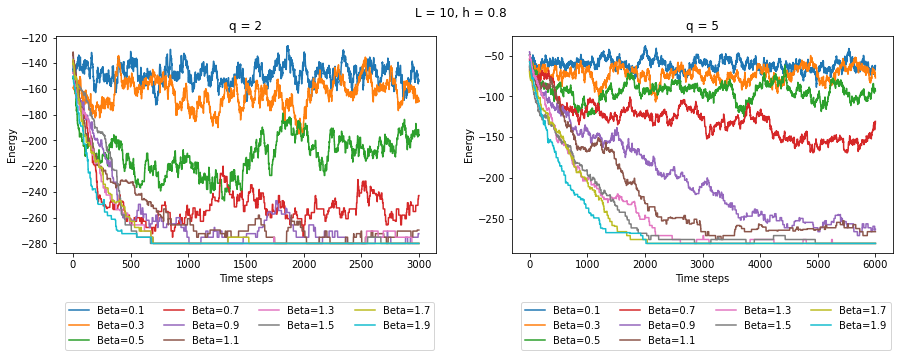

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,4))

q2_energy_v2 = energy_q_list_v2[0]
q5_energy_v2 = energy_q_list_v2[1]

for i in range(len(beta_list[::2])):
    ax[0].plot(q2_energy_v2[::2][i], label="Beta={}".format(np.round(beta_list[::2][i], 2)))
    ax[1].plot(q5_energy_v2[::2][i], label="Beta={}".format(np.round(beta_list[::2][i], 2)))
    
ax[0].set_xlabel('Time steps')
ax[0].set_ylabel('Energy')
ax[0].legend(loc='upper left', bbox_to_anchor=(0.01, -0.2), ncol = 4)

ax[1].set_xlabel('Time steps')
ax[1].set_ylabel('Energy')
ax[1].legend(loc='upper left', bbox_to_anchor=(0.01, -0.2), ncol = 4)

ax[0].set_title('q = 2')
ax[1].set_title('q = 5')
plt.suptitle('L = {}, h = {}'.format(L, ext_field))
plt.show()

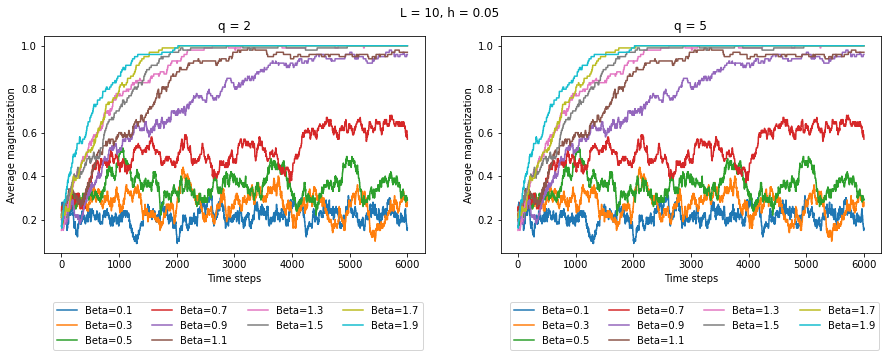

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,4))

q2_magnetization_v2 = magnetization_q_list_v2[0]
q5_magnetization_v2 = magnetization_q_list_v2[1]

for i in range(len(beta_list[::2])):
    ax[0].plot(q5_magnetization_v2[::2][i], label="Beta={}".format(np.round(beta_list[::2][i], 2)))
    ax[1].plot(q5_magnetization_v2[::2][i], label="Beta={}".format(np.round(beta_list[::2][i], 2)))
    
ax[0].set_xlabel('Time steps')
ax[0].set_ylabel('Average magnetization')
ax[0].legend(loc='upper left', bbox_to_anchor=(0.01, -0.2), ncol = 4)

ax[1].set_xlabel('Time steps')
ax[1].set_ylabel('Average magnetization')
ax[1].legend(loc='upper left', bbox_to_anchor=(0.01, -0.2), ncol = 4)


ax[0].set_title('q = 2')
ax[1].set_title('q = 5')
plt.suptitle('L = {}, h = {}'.format(L, ext_field))
plt.show()

Here, with a high external magnetic field, we obtain the trends of the energy and magnetization trajectories that we expect. Only 1 realization was performed that's why the trajectories are noisy

In [ ]:
#Determine burn-in time
burn_in_time_list_energyq2 = []
for beta in beta_list:
    if beta < 0.1:
        bit = 200
    elif (beta < 0.49) and (beta >= 0.1):
        bit = 400
    else:
        bit = 600
    burn_in_time_list_energyq2.append(bit)

burn_in_time_list_energyq5 = []
for beta in beta_list:
    if beta < 0.49:
        bit = 200
    elif (beta <= 0.89) and (beta >= 0.49):
        bit = 2000
    else:
        bit = 2000
    burn_in_time_list_energyq5.append(bit)
    
burn_in_time_list_magnetizationq2 = []
for beta in beta_list:
    if beta < 0.1:
        bit = 100
    elif (beta < 0.89) and (beta >= 0.1):
        bit = 300
    else:
        bit = 500
    burn_in_time_list_magnetizationq2.append(bit)

burn_in_time_list_magnetizationq5 = []
for beta in beta_list:
    if beta < 0.49:
        bit = 500
    else:
        bit = 1500
    burn_in_time_list_magnetizationq5.append(bit)

error for q2 [0.65684 0.55003 0.80068 0.69156 0.81831 0.91017 1.3642  1.78316 1.72866
 2.29072 2.35696 2.32522 1.63133 2.2736  2.31655 1.36394 1.37835 1.56931
 1.67123 1.17947]
error for q5 [0.32344 0.33772 0.43323 0.36102 0.37666 0.44153 0.45954 0.45151 0.54781
 1.09339 0.65872 2.03973 2.74128 2.81226 2.41677 1.89002 2.59845 2.02368
 1.9082  2.0208 ]


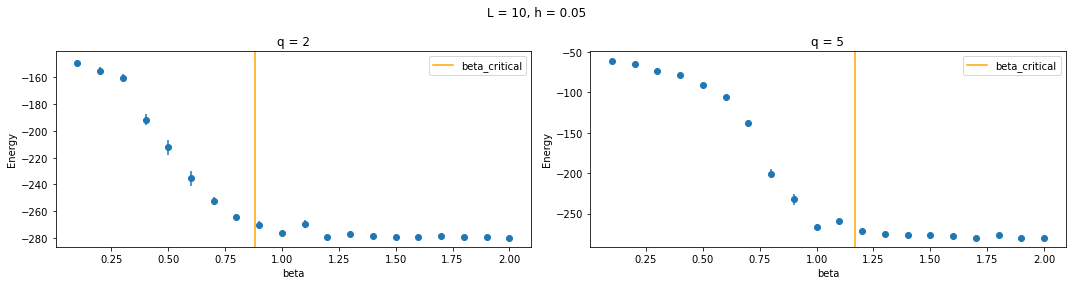

In [ ]:
energy_values_q2_v2 = uncorrelated_samples(q2_energy_v2, burn_in_time_list_energyq2, correlation_time)
energy_error_q2_v2 = compute_error(q2_energy_v2, burn_in_time_list_energyq2, correlation_time)

energy_values_q5_v2 = uncorrelated_samples(q5_energy_v2, burn_in_time_list_energyq5, correlation_time)
energy_error_q5_v2 = compute_error(q5_energy_v2, burn_in_time_list_energyq5, correlation_time)

fig, ax = plt.subplots(1,2,figsize=(15,4))
print('error for q2', np.round(energy_error_q2,5))
ax[0].errorbar(beta_list,energy_values_q2_v2,energy_error_q2_v2, fmt = 'o')
ax[1].errorbar(beta_list,energy_values_q5_v2,energy_error_q5_v2, fmt = 'o')

print('error for q5', np.round(energy_error_q5,5))


ax[0].set_xlabel('beta')
ax[0].set_ylabel('Energy')
ax[1].set_xlabel('beta')
ax[1].set_ylabel('Energy')

ax[0].axvline(0.88,color='orange',label='beta_critical')
ax[1].axvline(1.17,color='orange',label='beta_critical')

ax[0].legend()
ax[1].legend()

ax[0].set_title('q = 2')
ax[1].set_title('q = 5')
plt.suptitle('L = {}, h = {}'.format(L, ext_field))
plt.tight_layout()
plt.show()

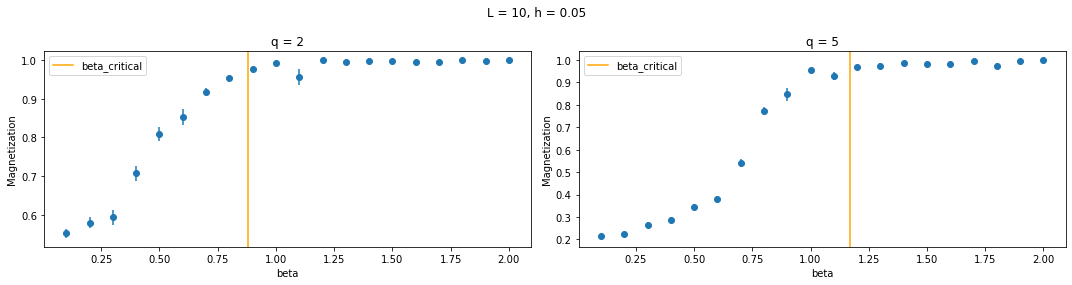

In [ ]:
magnetization_values_q2_v2 = uncorrelated_samples(q2_magnetization_v2, burn_in_time_list_magnetizationq2, correlation_time)
magnetization_error_q2_v2 = compute_error(q2_magnetization_v2, burn_in_time_list_magnetizationq2, correlation_time)

magnetization_values_q5_v2 = uncorrelated_samples(q5_magnetization_v2, burn_in_time_list_magnetizationq5, correlation_time)
magnetization_error_q5_v2 = compute_error(q5_magnetization_v2, burn_in_time_list_magnetizationq5, correlation_time)


fig, ax = plt.subplots(1,2,figsize=(15,4))
# print('error for q2', np.round(magnetization_error_q2,5))
ax[0].errorbar(beta_list,magnetization_values_q2_v2, magnetization_error_q2_v2, fmt = 'o')
ax[1].errorbar(beta_list,magnetization_values_q5_v2, magnetization_error_q5_v2, fmt = 'o')

# print('error for q5', np.round(magnetization_error_q5,5))


ax[0].set_xlabel('beta')
ax[0].set_ylabel('Magnetization')
ax[1].set_xlabel('beta')
ax[1].set_ylabel('Magnetization')

ax[0].axvline(0.88,color='orange',label='beta_critical')
ax[1].axvline(1.17,color='orange',label='beta_critical')

ax[0].legend()
ax[1].legend()

ax[0].set_title('q = 2')
ax[1].set_title('q = 5')
plt.suptitle('L = {}, h = {}'.format(L, ext_field))
plt.tight_layout()
plt.show()

From the plots above (energy vs beta, and magnetization vs beta) it is not surprising that we would be able to obtain the plot that we expect (where magnetization = 1 for beta values > beta_critical), and see the phase transition for q = 2. However, we would fail to see the discontinuity at q = 5.